In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

# Matplotlib의 다양한 플롯

## 1. Bar Chart
- x데이터가 카테고리인 경우

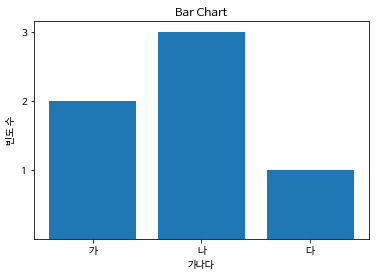

In [4]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

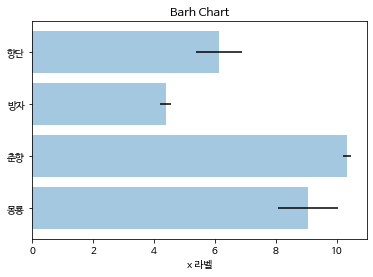

In [6]:
# 레이블이 길 경우 수평 바형 그래프 사용
np.random.seed(2021)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')
plt.show()

### 타이타닉 선실별 승객 수

In [7]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [11]:
df = titanic[['class', 'pclass']].groupby('class').count()
df

,pclass
class,
First,216
Second,184
Third,491


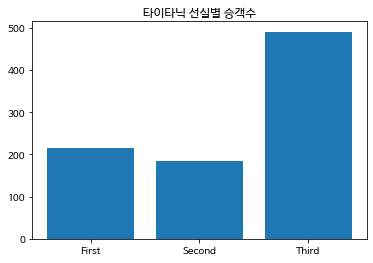

In [20]:
y = df.pclass.values
x = np.arange(len(y))
xlabel = df.index.to_list()

plt.title("타이타닉 선실별 승객수")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel=('선실')
plt.ylabel=('승객수')
plt.show()

## 2. 파이 차트
- 카테고리 별 값의 상대적인 비교를 해야할 때

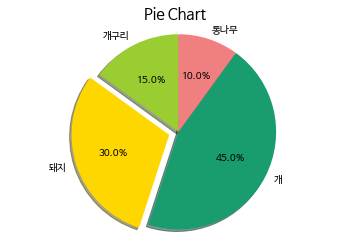

In [31]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]        # 합이 100이 되도록
colors = ['yellowgreen', 'gold', '#199c6e', 'lightcoral'] #색 지정 안해도 알아서 해줌
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart", fontsize= 15)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 3. 히스토그램
- 데이터의 분포

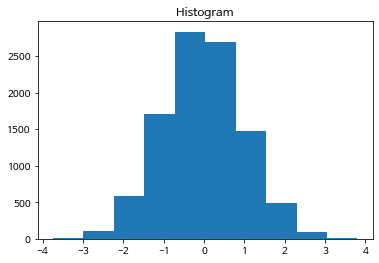

In [33]:
np.random.seed(0)
x = np.random.randn(10000)
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10)
plt.show()

In [34]:
arrays

array([  10.,  110.,  579., 1710., 2833., 2688., 1479.,  487.,   97.,
          7.])

In [35]:
bins

array([-3.74010064, -2.98592455, -2.23174847, -1.47757238, -0.7233963 ,
        0.03077979,  0.78495587,  1.53913196,  2.29330804,  3.04748413,
        3.80166021])

## 4. 산점도(Scatter Plot)
- 두 개의 실수 데이터 집합의 상관관계를 살펴볼 때 사용

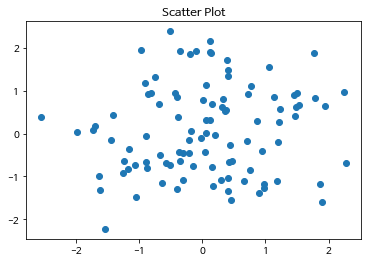

In [36]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

### Anscombe
- 선형 회귀선 : y = 3.0 + 0.5 * x

In [37]:
ans = sns.load_dataset('anscombe')

In [40]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [41]:
ans.groupby('dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

- Dataset 1에 대해서 산점도와 회귀선 그리기

In [42]:
ds1= ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


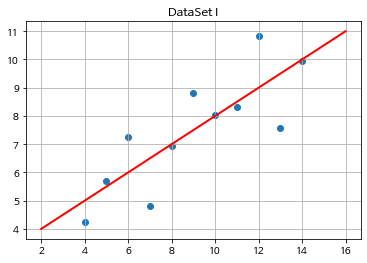

In [47]:
plt.scatter(ds1.x, ds1.y)
plt.plot([2,16], [4, 11], color= 'r', lw = 2)
plt.grid()
plt.title('DataSet I')
plt.show()

- 4개의 데이터 셋 모두에 대해서 그림

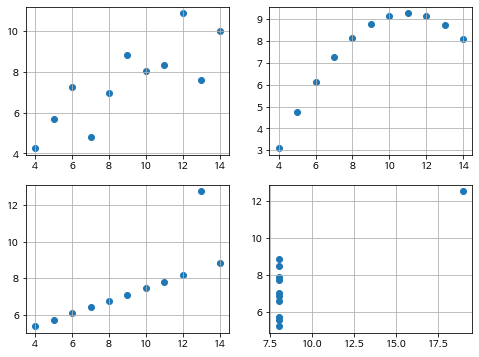

In [53]:
fig, axes = plt.subplots(2, 2, figsize = (8, 6))

for i, roman in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[i // 2, i %2 ]
    ax.scatter(ds.x, ds.y)
    ax.grid()

plt.show()

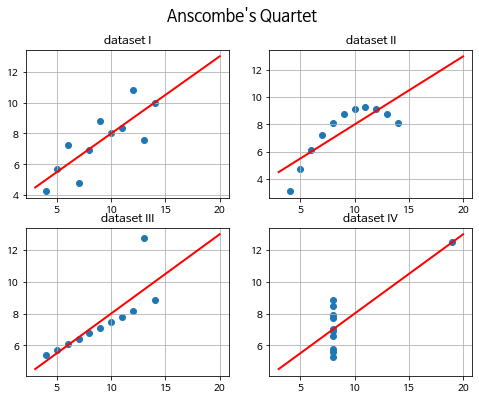

In [57]:
fig, axes = plt.subplots(2, 2, figsize = (8, 6))

for i, roman in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[i // 2, i %2 ]
    ax.scatter(ds.x, ds.y)
    ax.plot([3,20], [4.5, 13], 'r-', lw = 2)
    ax.set_title(f'dataset {roman}')
    ax.grid()

fig.suptitle("Anscombe's Quartet", fontsize= 16)
plt.show()

## Imshow
- 화상(image) 데이터처럼 행과 열을 가진 행렬 형태의 2차원 데이터는 imshow 명령을 써서 2차원 자료의 크기를 색깔로 표시하는 것이다.



- 이미지 데이터

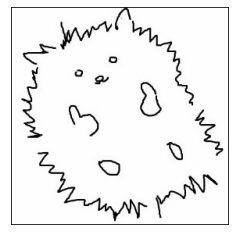

In [61]:
import matplotlib.image as img      # PIL, OpenCV(cv2)

image = img.imread('cat.jpg')
plt.imshow(image)
plt.xticks([]); plt.yticks([])
plt.show()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [62]:
digits.images.shape

(1797, 8, 8)

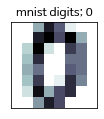

In [63]:
plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

## 6. Box Plot

In [64]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Setosa 품종의 각 feature의 박스 플롯



Text(0.5, 1.0, 'Setosa 품종의 각 feature의 박스 플롯')

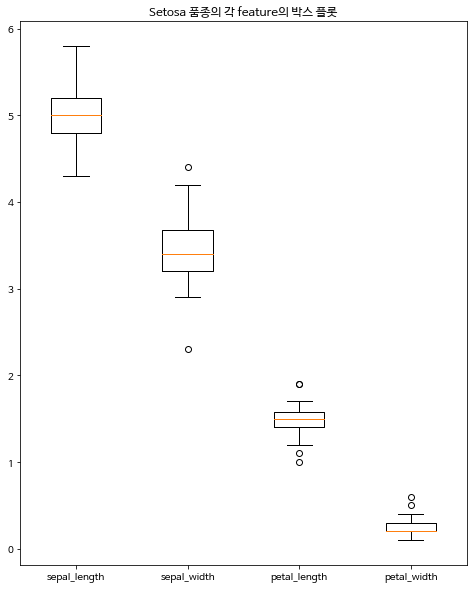

In [94]:
setosa = iris[iris.species == 'setosa']
plt.figure(figsize = (8,10))
plt.boxplot([setosa.sepal_length, setosa.sepal_width,
             setosa.petal_length, setosa.petal_width],
            labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title('Setosa 품종의 각 feature의 박스 플롯')

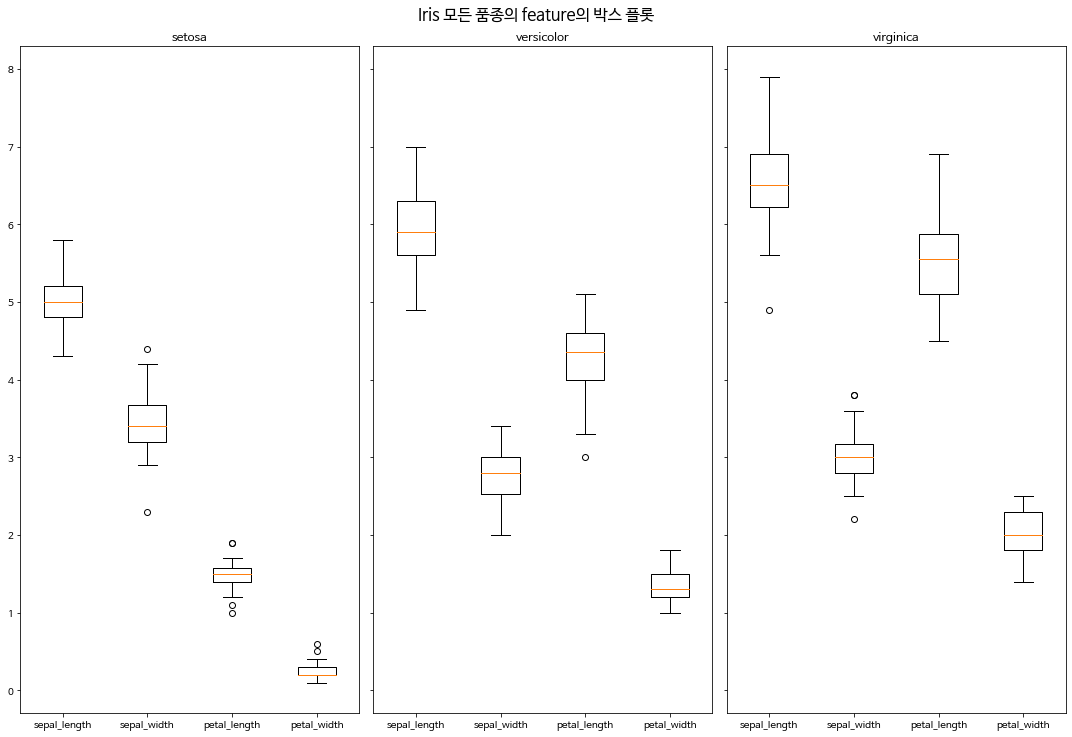

In [101]:
fig, axes = plt.subplots(1, 3, figsize = (15, 10), sharey= True)

for i, species in enumerate(iris.species.unique()):
    ax = axes[i]
    sp = iris[iris.species == species]
    ax.boxplot([sp.sepal_length, sp.sepal_width,
                 sp.petal_length, sp.petal_width],
                labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    ax.set_title(species)

plt.suptitle('Iris 모든 품종의 feature의 박스 플롯', fontsize = 16, y = 1.02)
plt.tight_layout()
plt.show()

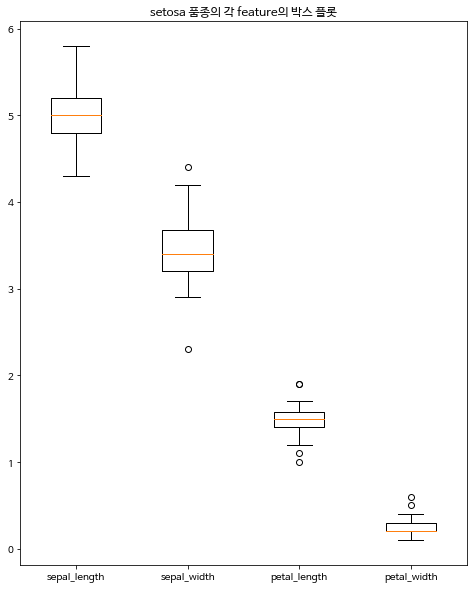

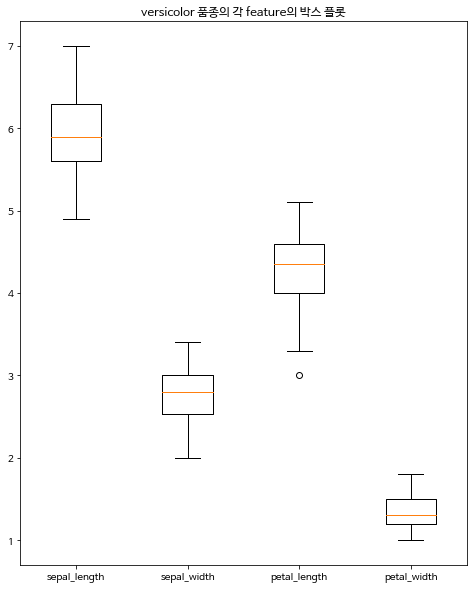

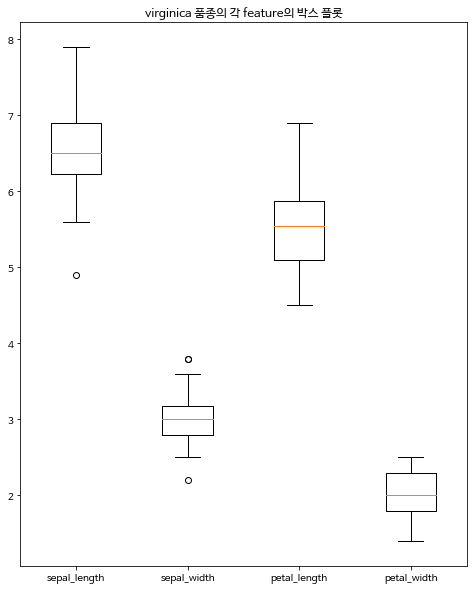

In [96]:
for species in iris.species.unique():
    sp = iris[iris.species == species]
    plt.figure(figsize = (8,10))
    plt.boxplot([sp.sepal_length, sp.sepal_width,
                 sp.petal_length, sp.petal_width],
                labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    plt.title(f'{species} 품종의 각 feature의 박스 플롯')